In [1]:
import numpy as np                 
import pandas as pd                
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
dataset_src = './archive (1)'

df_states = pd.read_csv(f'{dataset_src}/stations_info.csv')
df_states.drop(columns=['agency', 'station_location', 'start_month'], inplace=True)
df_states[df_states["state"] == "Tamil Nadu"].sort_values(by=["city","start_year"])
df_states

,file_name,state,city,start_month_num,start_year
0,AP001,Andhra Pradesh,Tirupati,7,2016
1,AP002,Andhra Pradesh,Vijayawada,5,2017
2,AP003,Andhra Pradesh,Visakhapatnam,7,2017
3,AP004,Andhra Pradesh,Rajamahendravaram,9,2017
4,AP005,Andhra Pradesh,Amaravati,11,2017
...,...,...,...,...,...
448,WB010,West Bengal,Howrah,5,2019
449,WB011,West Bengal,Kolkata,6,2019
450,WB012,West Bengal,Kolkata,8,2019
451,WB013,West Bengal,Kolkata,8,2019


In [3]:
unique_states = df_states['state'].unique()
unique_states

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Chandigarh', 'Delhi', 'Gujarat',
       'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Jammu and Kashmir',
       'Karnataka', 'Kerala', 'Maharashtra', 'Meghalaya', 'Manipur',
       'Madhya Pradesh', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Puducherry', 'Rajasthan', 'Sikkim', 'Telangana', 'Tamil Nadu',
       'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [4]:
def combine_state_df(state_name):
    '''
    Combine all state files into a single dataframe and attaching the city information.

    Parameters
    ----------
        state_name (str): The name of the state

    Return
    ------
        df (DataFrame): The combined dataframe from all files of a specific state
    '''
    
    state_code = df_states[df_states['state'] == state_name]['file_name'].iloc[0][:2]
    state_files = glob.glob(f'{dataset_src}/{state_code}*.csv')
    print(f'Combining a total of {len(state_files)} files...\n')
    combined_df = []
    
    for state_file in state_files:
        file_name = state_file.split(f'{dataset_src}\\')[1][0:-4]
        file_df = pd.read_csv(state_file)
        file_df['city'] = df_states[df_states['file_name'] == file_name]['city'].values[0]
        file_df['city'] = file_df['city'].astype('string')
        combined_df.append(file_df)
        
    return pd.concat(combined_df)

In [5]:
df = combine_state_df('Tamil Nadu')

Combining a total of 26 files...



In [6]:
df[df["RH ()"].notnull() & df["RH (%)"].isnull()]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,city,CH4 (ug/m3),THC (ug/m3),RH (),WD (degree),Xylene (ug/m3),AT (degree C),RF (mm),BP (mg/m3),NOx (ppm)
0,2019-03-28 14:00:00,2019-03-28 15:00:00,NaN,NaN,2.31,1.02,3.32,29.21,3.53,0.65,...,Chennai,NaN,NaN,49.97,69.59,NaN,NaN,5.64,NaN,NaN
1,2019-03-28 15:00:00,2019-03-28 16:00:00,48.62,49.48,1.66,1.77,3.42,16.97,2.30,0.44,...,Chennai,NaN,NaN,49.93,68.81,NaN,1.81,5.64,NaN,NaN
2,2019-03-28 16:00:00,2019-03-28 17:00:00,41.06,50.31,1.32,4.06,5.36,7.31,16.96,0.43,...,Chennai,NaN,NaN,49.98,52.62,NaN,5.28,5.65,NaN,NaN
3,2019-03-28 17:00:00,2019-03-28 18:00:00,47.02,59.68,1.38,6.32,7.69,1.79,22.22,0.39,...,Chennai,NaN,NaN,50.04,58.21,NaN,12.31,5.67,NaN,NaN
4,2019-03-28 18:00:00,2019-03-28 19:00:00,52.27,64.58,1.73,7.95,9.68,0.82,22.58,0.36,...,Chennai,NaN,NaN,49.98,66.81,NaN,11.98,5.68,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31545,2022-11-01 23:00:00,2022-11-02 00:00:00,19.31,32.89,12.50,NaN,7.73,5.41,12.73,0.43,...,Chennai,NaN,NaN,61.58,203.38,NaN,32.66,0.00,NaN,NaN
31554,2022-11-02 08:00:00,2022-11-02 09:00:00,18.29,21.45,12.79,NaN,7.26,5.57,10.87,0.48,...,Chennai,NaN,NaN,61.55,34.77,NaN,32.68,0.00,NaN,NaN
31555,2022-11-02 09:00:00,2022-11-02 10:00:00,20.18,29.25,12.19,NaN,7.43,5.45,11.24,0.45,...,Chennai,NaN,NaN,61.61,81.47,NaN,32.68,0.00,NaN,NaN
31556,2022-11-02 10:00:00,2022-11-02 11:00:00,15.05,30.36,9.26,2.28,8.96,4.88,12.08,0.45,...,Chennai,NaN,NaN,61.60,44.64,NaN,32.69,0.00,NaN,NaN


In [6]:
def columns_name(df):
    column_names = []
    for name in list(df.columns):
        column_names.append(name.split()[0])
    return sorted(column_names)

In [7]:
def create_dt_index(dataframe):
    dataframe = dataframe.drop(columns='To Date')
    dataframe['From Date'] = pd.to_datetime(dataframe['From Date'])
    dataframe = dataframe.rename(columns={'From Date': 'datetime'})
    return dataframe.set_index('datetime')

df = create_dt_index(df)

In [8]:
def plot_groups(dataframe, feature_groups, columns=1):
    fig, axes = plt.subplots(1, columns, figsize=(15,5))
    fig.tight_layout(pad=4.0)
    fig.suptitle('Group Similarities')
    
    row_num = 0
    col_num = 0
    for pos, group in enumerate(feature_groups):
        # Move to new row
        if pos % columns == 0 and pos != 0:
            row_num += 1
            col_num = 0
            
        for feature in feature_groups[group]:
            df_feature = dataframe[dataframe[feature].notnull()][feature]
            df_feature = df_feature.groupby([df_feature.index.year]).mean(numeric_only=True)
            sns.lineplot(data=df_feature, label=feature)

    plt.plot()

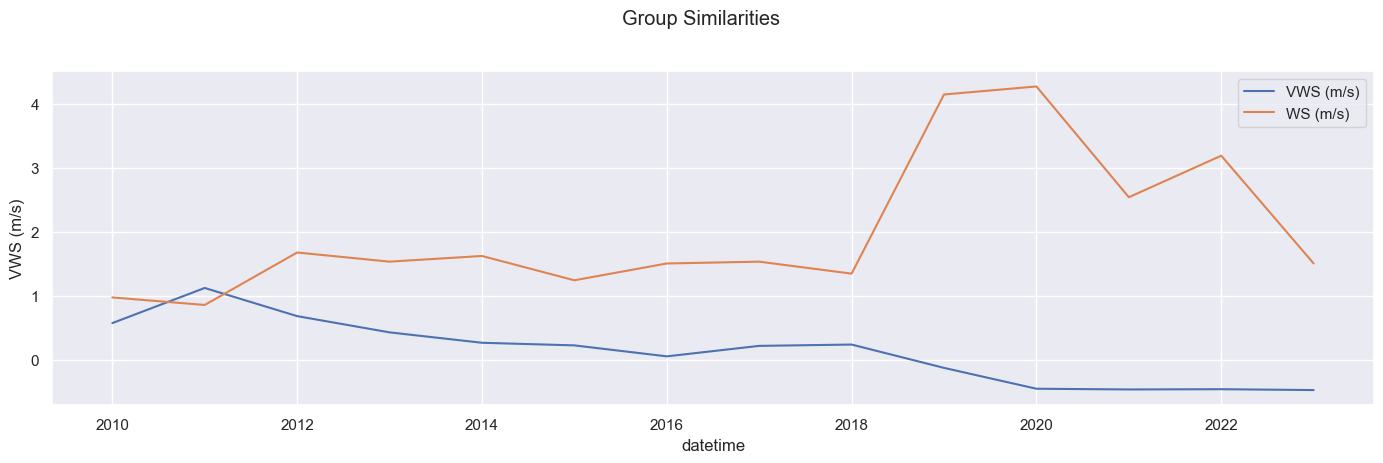

In [10]:
plot_groups(df, {'wind Speed':['VWS (m/s)',"WS (m/s)"]})

In [9]:
cities = list(df["city"].unique())
cities

['Chennai',
 'Coimbatore',
 'Thoothukudi',
 'Gummidipoondi',
 'Hosur',
 'Tirupur',
 'Chengalpattu',
 'Vellore',
 'Salem',
 'Ramanathapuram',
 'Dindigul',
 'Ooty',
 'Kanchipuram',
 'Ariyalur',
 'Cuddalore',
 'Palkalaiperur']

In [10]:
def column_merger(column_name1,column_name2,convertion = 1):
    df[column_name2] = df[column_name2] * convertion
    df[column_name1].fillna(df[column_name2],inplace = True)
    df.drop([column_name2], axis=1, inplace=True)

column_merger("NOx (ppb)","NOx (ppm)",1000)
column_merger('BP (mmHg)','BP (mg/m3)',0.00750062)
column_merger('WD (degree)','WD (deg)')
column_merger('RH (%)','RH ()')
column_merger('WS (m/s)','VWS (m/s)')

In [11]:
def value_dropper(df):
    # dropping values that have more than 80% null values
    null_values = null_value_percentage(df)
    droppable_values = [key for key, value in null_values.items() if value > 0.80 ]
    df.drop(droppable_values,axis=1,inplace=True)
    return df

def null_columns_per_city(df):
    Null_Value_Dictionary = {}
    for i in range(len(cities)):
        Null_Value_Dictionary[cities[i]] = df.columns[df[df["city"] == cities[i]].isnull().all()].tolist()
    return [key + f"   {len(value)}  {value}" for key, value in Null_Value_Dictionary.items()]

def null_value_percentage(df):
    null_percentage = {}
    for i in list(df.columns):
        null_percentage[i] = round(len(df[df[i].isnull()])/len(df),3)
    return null_percentage

nulls = null_value_percentage(df)
print("Null Value Percentage Per column\n")
print(nulls)
print("Dropping Columns: \n")
[print(key,value) for key, value in nulls.items() if value > 0.80 ]

Null Value Percentage Per column

{'PM2.5 (ug/m3)': 0.405, 'PM10 (ug/m3)': 0.601, 'NO (ug/m3)': 0.212, 'NO2 (ug/m3)': 0.198, 'NOx (ppb)': 0.211, 'NH3 (ug/m3)': 0.537, 'SO2 (ug/m3)': 0.237, 'CO (mg/m3)': 0.358, 'Ozone (ug/m3)': 0.403, 'Benzene (ug/m3)': 0.587, 'Toluene (ug/m3)': 0.6, 'Eth-Benzene (ug/m3)': 0.895, 'MP-Xylene (ug/m3)': 0.888, 'O Xylene (ug/m3)': 0.888, 'Temp (degree C)': 0.576, 'RH (%)': 0.23, 'WS (m/s)': 0.206, 'SR (W/mt2)': 0.26, 'BP (mmHg)': 0.393, 'city': 0.0, 'CH4 (ug/m3)': 0.925, 'THC (ug/m3)': 0.949, 'WD (degree)': 0.252, 'Xylene (ug/m3)': 1.0, 'AT (degree C)': 0.819, 'RF (mm)': 0.756}
Dropping Columns: 

Eth-Benzene (ug/m3) 0.895
MP-Xylene (ug/m3) 0.888
O Xylene (ug/m3) 0.888
CH4 (ug/m3) 0.925
THC (ug/m3) 0.949
Xylene (ug/m3) 1.0
AT (degree C) 0.819


[None, None, None, None, None, None, None]

In [12]:
value_dropper(df)

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),city,WD (degree),RF (mm)
datetime,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,77.97,167.54,245.51,NaN,4.71,2.25,2.71,NaN,NaN,26.16,88.30,0.54,3.08,1006.85,Chennai,239.00,NaN
2010-01-01 01:00:00,NaN,NaN,64.10,139.83,203.94,NaN,6.45,2.26,2.70,NaN,NaN,25.91,89.95,0.55,3.09,1006.36,Chennai,242.69,NaN
2010-01-01 02:00:00,NaN,NaN,44.99,100.53,145.53,NaN,8.12,0.80,2.31,NaN,NaN,25.26,93.05,0.55,2.95,1005.71,Chennai,284.26,NaN
2010-01-01 03:00:00,NaN,NaN,42.99,92.17,135.16,NaN,6.59,0.27,2.26,NaN,NaN,24.52,97.29,0.68,2.99,1005.45,Chennai,289.22,NaN
2010-01-01 04:00:00,NaN,NaN,32.31,69.98,102.30,NaN,4.66,1.05,2.07,NaN,NaN,24.24,97.95,0.55,3.11,1005.67,Chennai,285.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,15.73,32.02,218.63,0.13,218.77,3.78,40.95,1.02,1.00,NaN,NaN,NaN,65.58,2.77,0.00,995.42,Palkalaiperur,146.16,NaN
2023-03-31 20:00:00,25.81,53.94,235.28,0.09,235.38,3.89,40.38,0.91,0.92,NaN,NaN,NaN,64.94,2.54,0.00,996.45,Palkalaiperur,141.63,NaN
2023-03-31 21:00:00,19.42,40.04,236.99,0.08,237.07,3.97,40.47,0.77,1.12,NaN,NaN,NaN,70.86,2.24,0.00,997.45,Palkalaiperur,138.47,NaN


In [13]:
len(df.columns)

19

In [16]:
pollutants = {
    # A mixture of solid particles and liquid droplets found in the air.
    'Particulate Matter' : ['PM2.5 (ug/m3)', 'PM10 (ug/m3)'],

    # Nitrogen gases form when fuel is burned at high temperatures.
    'Nitrogen Compounds' : ['NOx (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)'],

    # These are found in coal tar, crude petroleum, paint, vehicle exhausts and industrial emissions.
    'Hydrocarbons' : ['Benzene (ug/m3)','Toluene (ug/m3)'],

    # Released from the partial combustion of carbon-containing compounds.
    'Carbon Monoxide': ['CO (mg/m3)'],

    # Released naturally by volcanic activity and is produced as a by-product of copper extraction and the burning of sulfur-bearing fossil fuels.
    'Sulfur Dioxide': ['SO2 (ug/m3)'],

    # It is created mostly the combustion of fossil fuels.
    'Ozone Concentration' : ['Ozone (ug/m3)']
}

other_metrics = {
    # Affects Earth's average temperatures
    'Solar Radiation' : ['SR (W/mt2)'],

    'Temperatures' : ['Temp (degree C)'],

    'Relative Humidity' : ['RH (%)'],

    'Rainfall' : ['RF (mm)'],

    'Barometric Pressure' : ['BP (mmHg)'],

    'Wind Direction' : ['WD (degree)'],

    'Wind Speed' : ['WS (m/s)']
}

In [17]:
slice_groups = {
    'Group by Day':   df.groupby(pd.Grouper(freq='1D')).mean(numeric_only=True),
    'Group by Month': df.groupby(pd.Grouper(freq='1M')).mean(numeric_only=True),
    'Group by Year':  df.groupby(pd.Grouper(freq='1Y')).mean(numeric_only=True),
    'Group by city' :df.groupby([pd.Grouper(freq='1D'),'city']).mean(numeric_only=True)
}

In [14]:
def plot_metrics(features, slice_groups):    
    for feature in features:
        fig, ax = plt.subplots(1, 1, figsize=(12, 4))
        fig.suptitle(feature)
        
        labels = []
        for i, (group, group_df) in enumerate(slice_groups.items()):
            print(group)
            data_slice = group_df[group_df.columns.intersection(pollutants[feature])]
            
            # Keep only the NOx feature, as it combines both NO (Nitrogen Oxide) and NO2 (Nitrogen Dioxide)
            if feature == "Nitrogen Compounds":
                data_slice = data_slice.drop(['NO (ug/m3)', 'NO2 (ug/m3)'], axis=1)
                
            data_slice.plot(kind="line", ax=ax)
            
            for column in data_slice.columns:
                labels.append(f'{column} [{group}]')
            if group_df == "Group by city":
                break
                
            
        ax.legend(labels)    
        plt.plot()

Group by Day


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

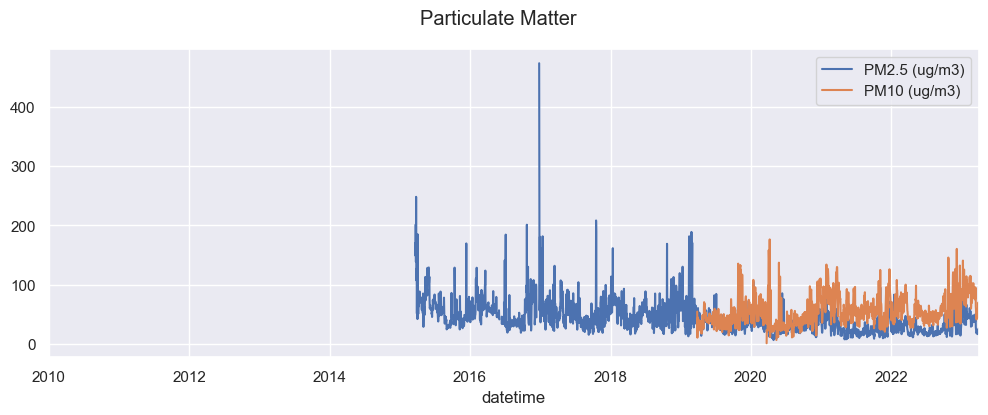

In [21]:
features_to_plot = ['Particulate Matter', 'Carbon Monoxide', 'Ozone Concentration', 'Nitrogen Compounds']
plot_metrics(features_to_plot, slice_groups)

In [18]:
for feature in features_to_plot:
    data_slice = slice_groups['Group by Day'][slice_groups['Group by Day'].columns.intersection(pollutants[feature])]
    data_slice.query('datetime > 2022 and datetime < 2023').plot(title=feature, figsize=(12,4))

NameError: name 'features_to_plot' is not defined

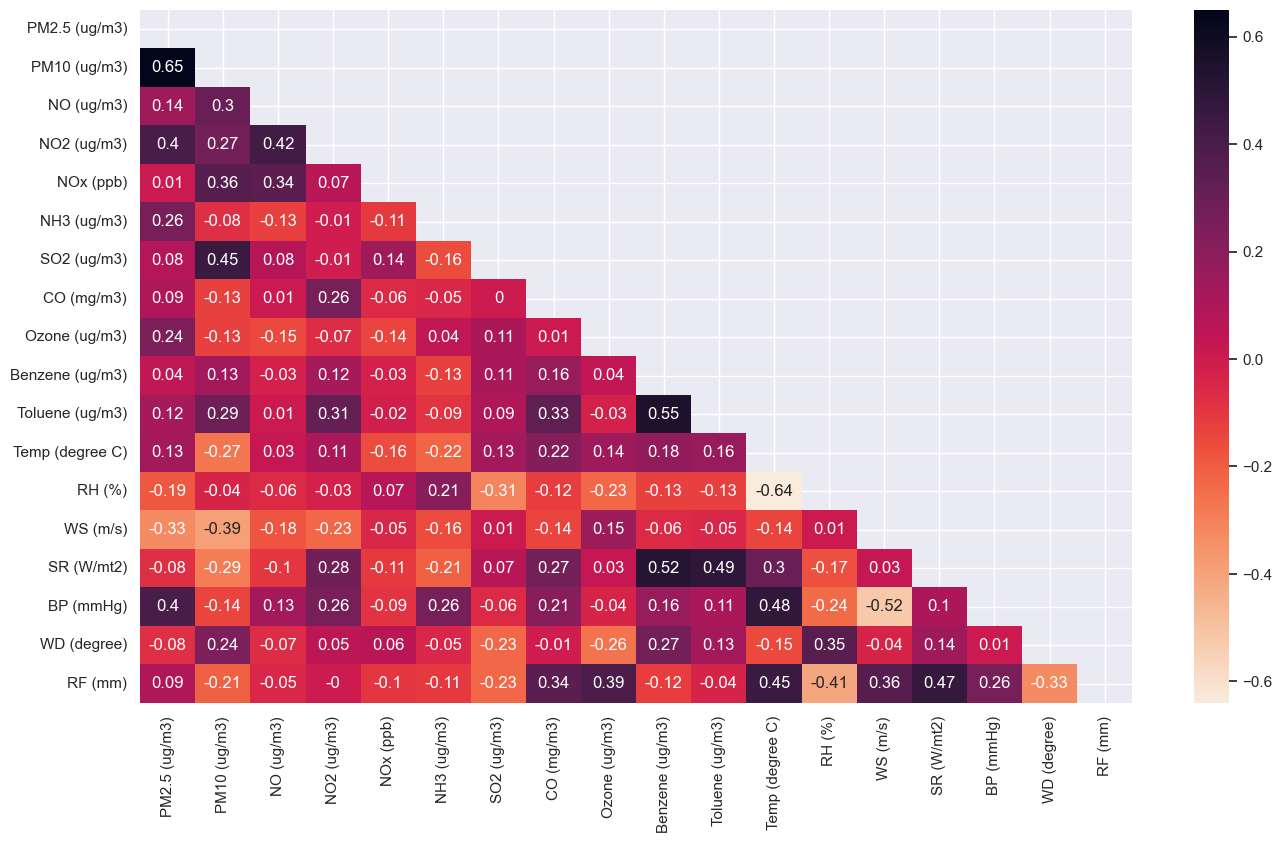

In [19]:
corr = slice_groups['Group by Day'].corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16,9))
sns.heatmap(data=corr, mask=mask, annot=True, cmap="rocket_r")
plt.show()

In [23]:
import missingno as msno

<Axes: >

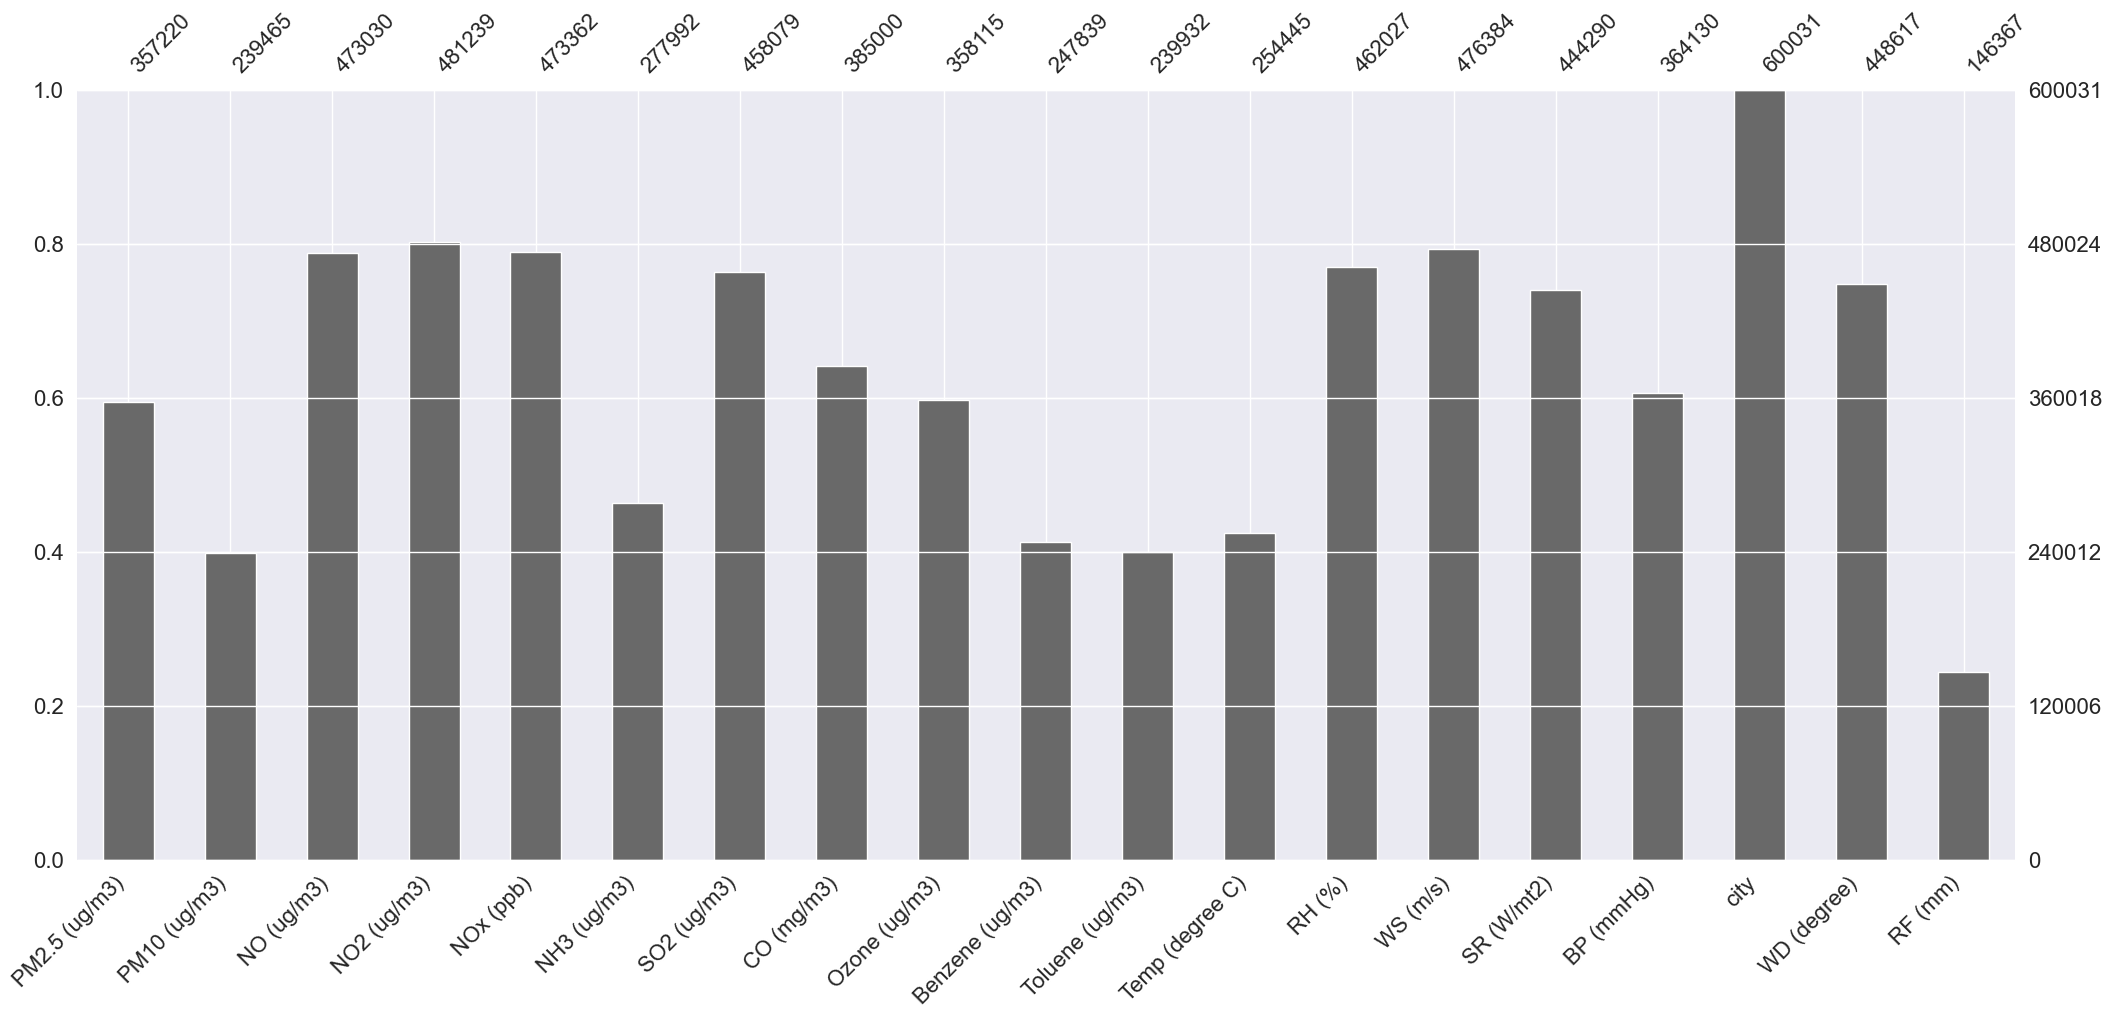

In [24]:
msno.bar(df)

<Axes: >

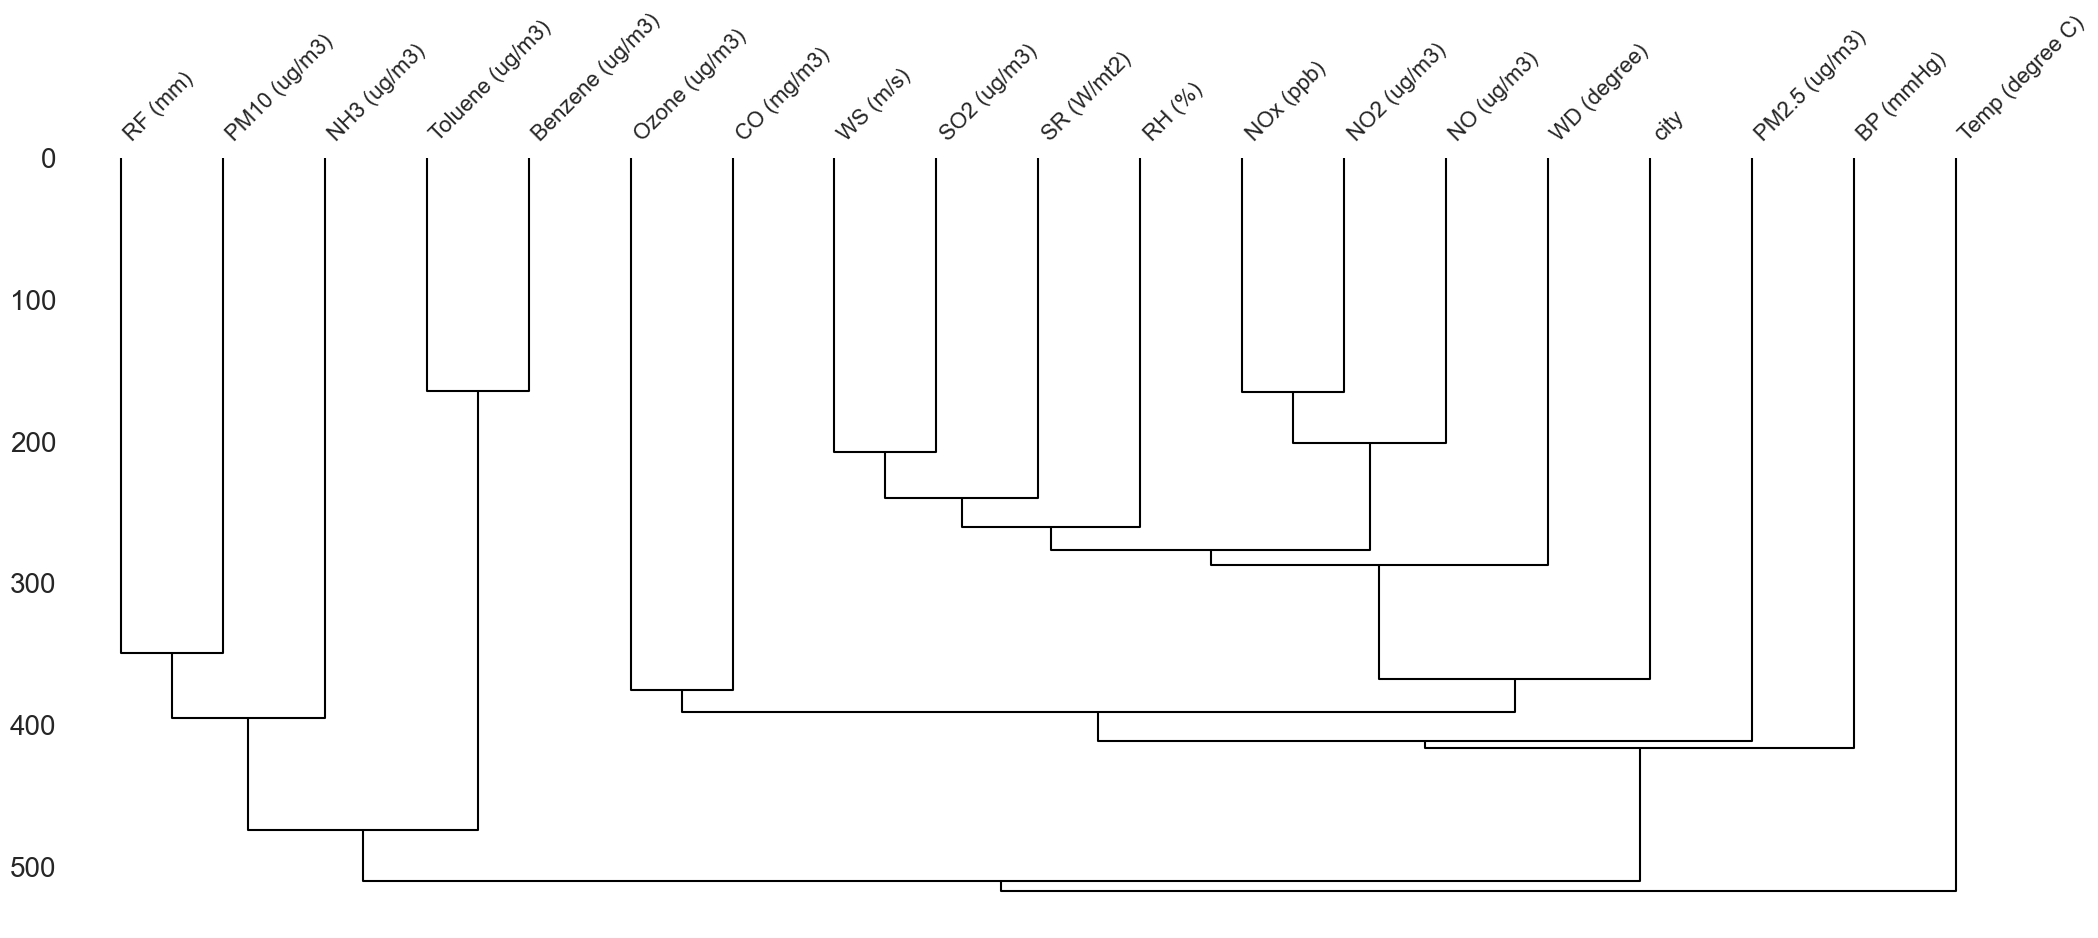

In [25]:
msno.dendrogram(df)

In [39]:
df.to_csv("TamilNadu1.csv")

In [31]:
null_columns_per_city(df)

['Chennai   0  []',
 "Coimbatore   1  ['Temp (degree C)']",
 "Thoothukudi   2  ['PM2.5 (ug/m3)', 'NH3 (ug/m3)']",
 "Gummidipoondi   4  ['CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)']",
 "Hosur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Tirupur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Chengalpattu   5  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",
 "Vellore   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Salem   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ramanathapuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Dindigul   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ooty   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Kanchipuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ariyalur   6  ['Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600031 entries, 2010-01-01 00:00:00 to 2023-03-31 23:00:00
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PM2.5 (ug/m3)    357220 non-null  float64
 1   PM10 (ug/m3)     239465 non-null  float64
 2   NO (ug/m3)       473030 non-null  float64
 3   NO2 (ug/m3)      481239 non-null  float64
 4   NOx (ppb)        473362 non-null  float64
 5   NH3 (ug/m3)      277992 non-null  float64
 6   SO2 (ug/m3)      458079 non-null  float64
 7   CO (mg/m3)       385000 non-null  float64
 8   Ozone (ug/m3)    358115 non-null  float64
 9   Benzene (ug/m3)  247839 non-null  float64
 10  Toluene (ug/m3)  239932 non-null  float64
 11  Temp (degree C)  254445 non-null  float64
 12  RH (%)           462027 non-null  float64
 13  WS (m/s)         476384 non-null  float64
 14  SR (W/mt2)       444290 non-null  float64
 15  BP (mmHg)        364130 non-null  float64
 16  city

In [20]:
df.duplicated().sum()

88098

In [30]:
starting_date_citywise = {}

In [21]:
for city in cities:
#     starting_date_citywise[city] = [df[df["city"] == city]["From Date"]]
    start_Date = df[df["city"] == city].index.min()
    end_Date = df[df["city"] == city].index.max()
    print(f"The available data for {city} is between {start_Date} and {end_Date}")

The available data for Chennai is between 2010-01-01 00:00:00 and 2023-03-31 23:00:00
The available data for Coimbatore is between 2019-06-12 11:00:00 and 2023-03-31 23:00:00
The available data for Thoothukudi is between 2020-11-07 23:00:00 and 2023-03-31 23:00:00
The available data for Gummidipoondi is between 2021-01-05 11:00:00 and 2023-03-31 23:00:00
The available data for Hosur is between 2022-08-08 16:00:00 and 2023-03-31 23:00:00
The available data for Tirupur is between 2022-08-26 15:00:00 and 2023-03-31 23:00:00
The available data for Chengalpattu is between 2022-08-08 11:00:00 and 2023-03-31 23:00:00
The available data for Vellore is between 2022-08-26 16:00:00 and 2023-03-31 23:00:00
The available data for Salem is between 2022-08-30 17:00:00 and 2023-03-31 23:00:00
The available data for Ramanathapuram is between 2022-08-08 16:00:00 and 2023-03-31 23:00:00
The available data for Dindigul is between 2022-09-12 09:00:00 and 2023-03-31 23:00:00
The available data for Ooty is b

In [22]:
dropping_cities = ["Cuddalore","Palkalaiperur"]
df.drop(df[df.city.isin(dropping_cities)].index)

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),city,WD (degree),RF (mm)
datetime,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,77.97,167.54,245.51,NaN,4.71,2.25,2.71,NaN,NaN,26.16,88.30,0.54,3.08,1006.85,Chennai,239.00,NaN
2010-01-01 01:00:00,NaN,NaN,64.10,139.83,203.94,NaN,6.45,2.26,2.70,NaN,NaN,25.91,89.95,0.55,3.09,1006.36,Chennai,242.69,NaN
2010-01-01 02:00:00,NaN,NaN,44.99,100.53,145.53,NaN,8.12,0.80,2.31,NaN,NaN,25.26,93.05,0.55,2.95,1005.71,Chennai,284.26,NaN
2010-01-01 03:00:00,NaN,NaN,42.99,92.17,135.16,NaN,6.59,0.27,2.26,NaN,NaN,24.52,97.29,0.68,2.99,1005.45,Chennai,289.22,NaN
2010-01-01 04:00:00,NaN,NaN,32.31,69.98,102.30,NaN,4.66,1.05,2.07,NaN,NaN,24.24,97.95,0.55,3.11,1005.67,Chennai,285.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 10:00:00,43.45,58.45,455.80,70.58,408.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,654.62,1005.17,Ariyalur,239.36,NaN
2023-03-13 11:00:00,42.56,55.57,479.82,75.44,430.22,2.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11,777.68,1004.35,Ariyalur,239.64,NaN
2023-03-13 12:00:00,36.00,56.00,449.48,76.44,406.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.26,767.63,1003.00,Ariyalur,205.06,NaN


In [36]:
len(df[(df["city"] == "Chennai") & (df.index.year <= 2021)])

379078

In [37]:
df[df.index.year >2021]["city"].value_counts()

city
Chennai           93008
Coimbatore        15872
Thoothukudi       10920
Gummidipoondi     10920
Chengalpattu       5653
Hosur              5648
Ramanathapuram     5648
Tirupur            5217
Vellore            5216
Salem              5119
Dindigul           4815
Ooty               4368
Kanchipuram        3753
Ariyalur           2433
Cuddalore           881
Palkalaiperur       367
Name: count, dtype: Int64

<Axes: xlabel='city'>

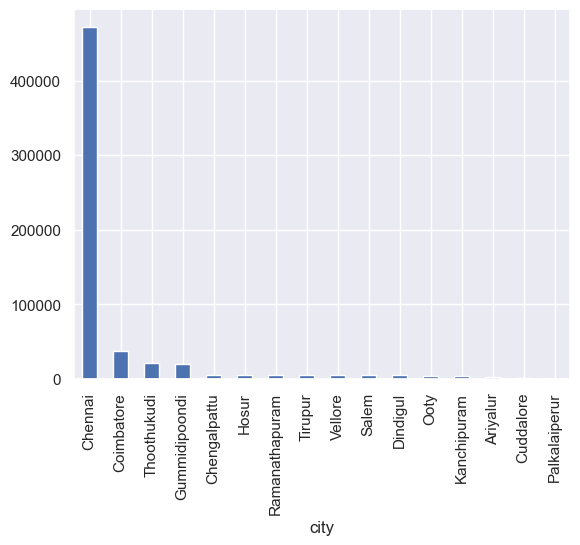

In [38]:
df["city"].value_counts().plot.bar()

In [23]:
interpolateble_values = []
for k, v in null_value_percentage(df[df.index.year > 2021]).items():
    if v <0.2:
        interpolateble_values.append(k)
interpolateble_values

['NO2 (ug/m3)', 'NOx (ppb)', 'SO2 (ug/m3)', 'WS (m/s)', 'SR (W/mt2)', 'city']

In [24]:
null_columns_per_city(df[df.index.year > 2021])

['Chennai   0  []',
 "Coimbatore   1  ['Temp (degree C)']",
 "Thoothukudi   2  ['PM2.5 (ug/m3)', 'NH3 (ug/m3)']",
 "Gummidipoondi   4  ['CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)']",
 "Hosur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Tirupur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Chengalpattu   5  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",
 "Vellore   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Salem   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ramanathapuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Dindigul   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ooty   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Kanchipuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ariyalur   6  ['Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",

In [43]:
data = df[df.index.year > 2021]

In [44]:
data

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),city,WD (degree),RF (mm)
datetime,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,35.09,68.99,5.07,50.43,55.49,101.78,NaN,1.55,6.46,0.0,0.0,NaN,89.94,2.31,14.03,761.55,Chennai,100.49,NaN
2022-01-01 01:00:00,30.10,61.31,3.92,47.35,51.26,82.11,NaN,1.40,6.47,0.0,0.0,NaN,91.43,2.17,14.54,761.03,Chennai,91.62,NaN
2022-01-01 02:00:00,31.42,63.34,3.44,43.26,46.70,92.16,NaN,1.34,6.35,0.0,0.0,NaN,89.12,2.28,14.30,760.46,Chennai,103.66,NaN
2022-01-01 03:00:00,29.09,59.76,3.23,40.54,43.77,99.07,41.83,0.84,7.90,0.0,0.0,NaN,86.77,2.81,15.60,760.20,Chennai,100.03,NaN
2022-01-01 04:00:00,24.64,52.91,3.22,39.03,42.25,95.56,30.48,0.84,12.71,0.0,0.0,NaN,86.04,2.65,16.48,760.31,Chennai,100.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,15.73,32.02,218.63,0.13,218.77,3.78,40.95,1.02,1.00,NaN,NaN,NaN,65.58,2.77,0.00,995.42,Palkalaiperur,146.16,NaN
2023-03-31 20:00:00,25.81,53.94,235.28,0.09,235.38,3.89,40.38,0.91,0.92,NaN,NaN,NaN,64.94,2.54,0.00,996.45,Palkalaiperur,141.63,NaN
2023-03-31 21:00:00,19.42,40.04,236.99,0.08,237.07,3.97,40.47,0.77,1.12,NaN,NaN,NaN,70.86,2.24,0.00,997.45,Palkalaiperur,138.47,NaN


In [45]:
dropping_cities = ["Cuddalore","Palkalaiperur"]
data.drop(data[data.city.isin(dropping_cities)].index,inplace=True)

C:\Users\Abdul Basith R\AppData\Local\Temp\ipykernel_23160\645777645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.city.isin(dropping_cities)].index,inplace=True)


In [46]:
data

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),city,WD (degree),RF (mm)
datetime,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,35.09,68.99,5.07,50.43,55.49,101.78,NaN,1.55,6.46,0.0,0.0,NaN,89.94,2.31,14.03,761.55,Chennai,100.49,NaN
2022-01-01 01:00:00,30.10,61.31,3.92,47.35,51.26,82.11,NaN,1.40,6.47,0.0,0.0,NaN,91.43,2.17,14.54,761.03,Chennai,91.62,NaN
2022-01-01 02:00:00,31.42,63.34,3.44,43.26,46.70,92.16,NaN,1.34,6.35,0.0,0.0,NaN,89.12,2.28,14.30,760.46,Chennai,103.66,NaN
2022-01-01 03:00:00,29.09,59.76,3.23,40.54,43.77,99.07,41.83,0.84,7.90,0.0,0.0,NaN,86.77,2.81,15.60,760.20,Chennai,100.03,NaN
2022-01-01 04:00:00,24.64,52.91,3.22,39.03,42.25,95.56,30.48,0.84,12.71,0.0,0.0,NaN,86.04,2.65,16.48,760.31,Chennai,100.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 10:00:00,43.45,58.45,455.80,70.58,408.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,654.62,1005.17,Ariyalur,239.36,NaN
2023-03-13 11:00:00,42.56,55.57,479.82,75.44,430.22,2.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11,777.68,1004.35,Ariyalur,239.64,NaN
2023-03-13 12:00:00,36.00,56.00,449.48,76.44,406.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.26,767.63,1003.00,Ariyalur,205.06,NaN


In [26]:
pollutant_values = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)']

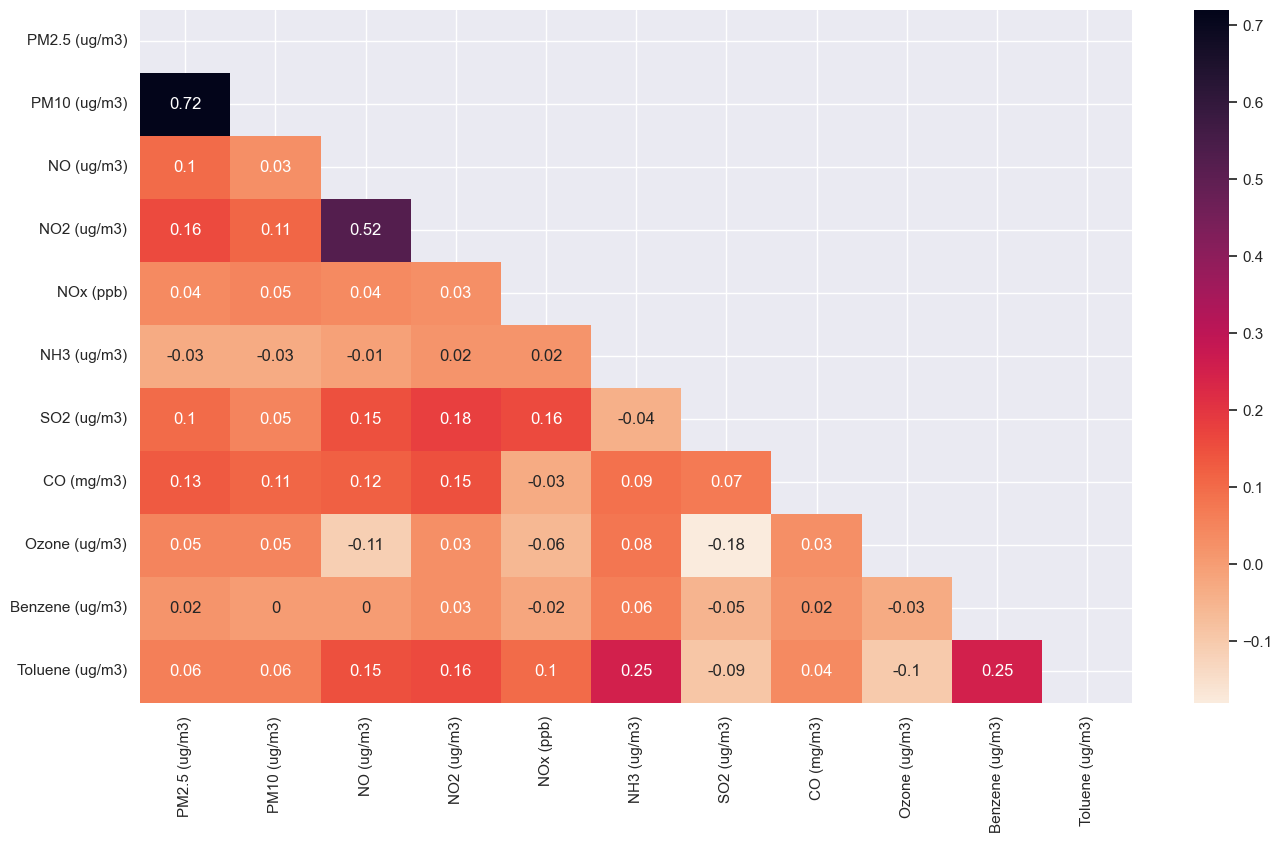

In [44]:
corr = data[pollutant_values].corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16,9))
sns.heatmap(data=corr, mask=mask, annot=True, cmap="rocket_r")
plt.show()

In [45]:
environmental_values = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)', 'BP (mmHg)', 'WD (degree)', 'RF (mm)']

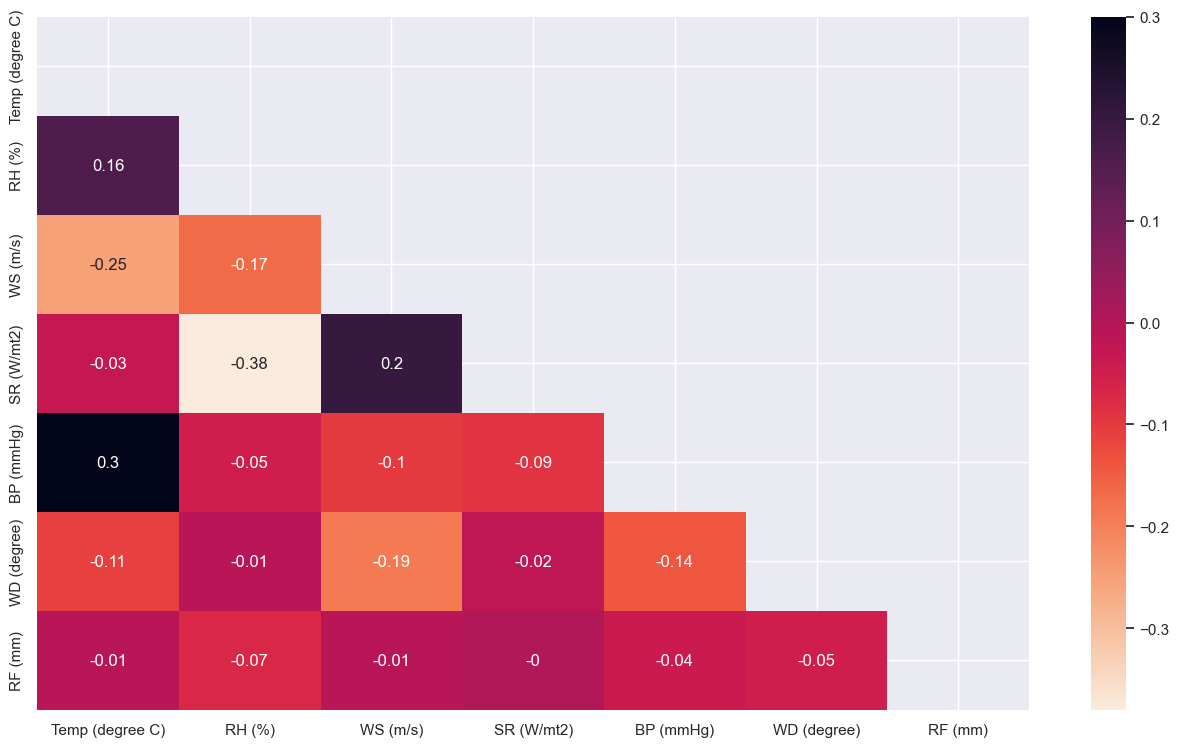

In [46]:
corr = data[environmental_values].corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16,9))
sns.heatmap(data=corr, mask=mask, annot=True, cmap="rocket_r")
plt.show()

# Imputing Values

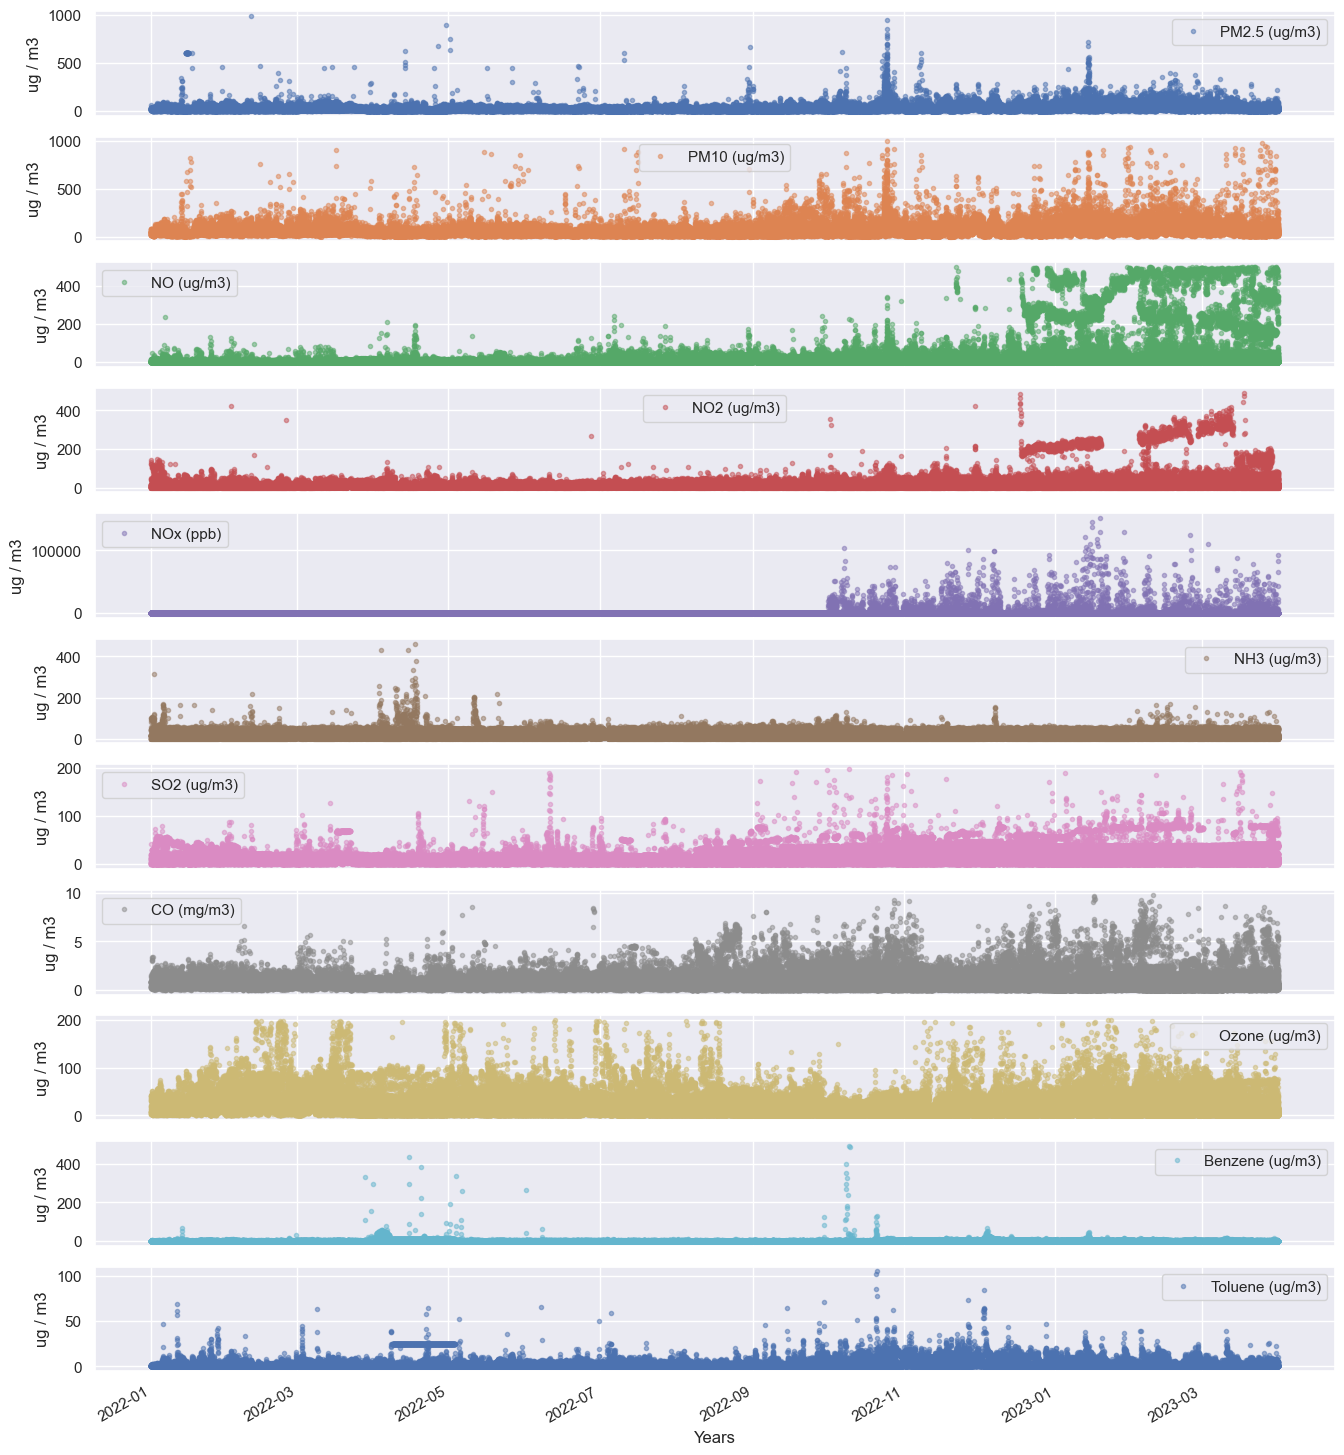

In [47]:
axes = data[pollutant_values].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [27]:
def trend_plot(df,value):
    
    # Prepare data
    df['year'] = [d.year for d in df["datetime"]]
    df['month'] = [d.strftime('%b') for d in df["datetime"]]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

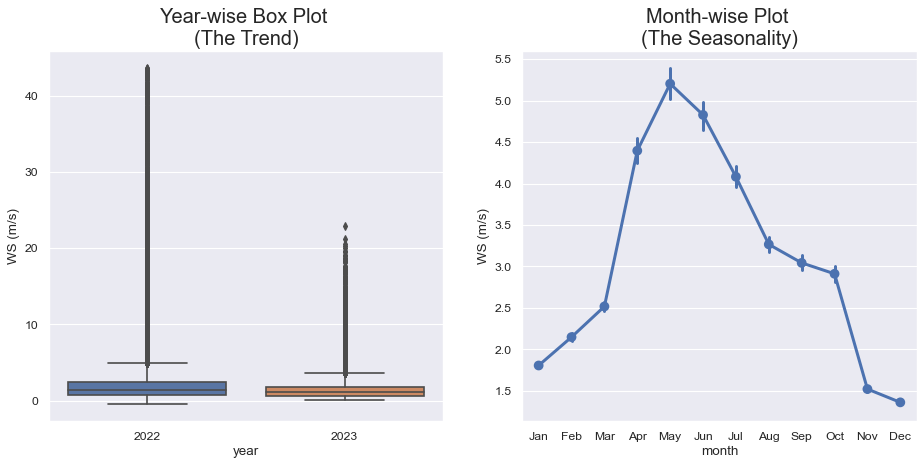

In [49]:
NO2_data = data.reset_index().copy()
value='WS (m/s)'
trend_plot(NO2_data,value)

In [28]:
def missing_value_validation(value):
    air_q = df[value].reset_index()
    air_q["interpolate(method='linear')"] = air_q[value].interpolate(method='linear')

    compare_dists(air_q[value], {"Linear Interpolation": air_q["interpolate(method='linear')"]})

In [29]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

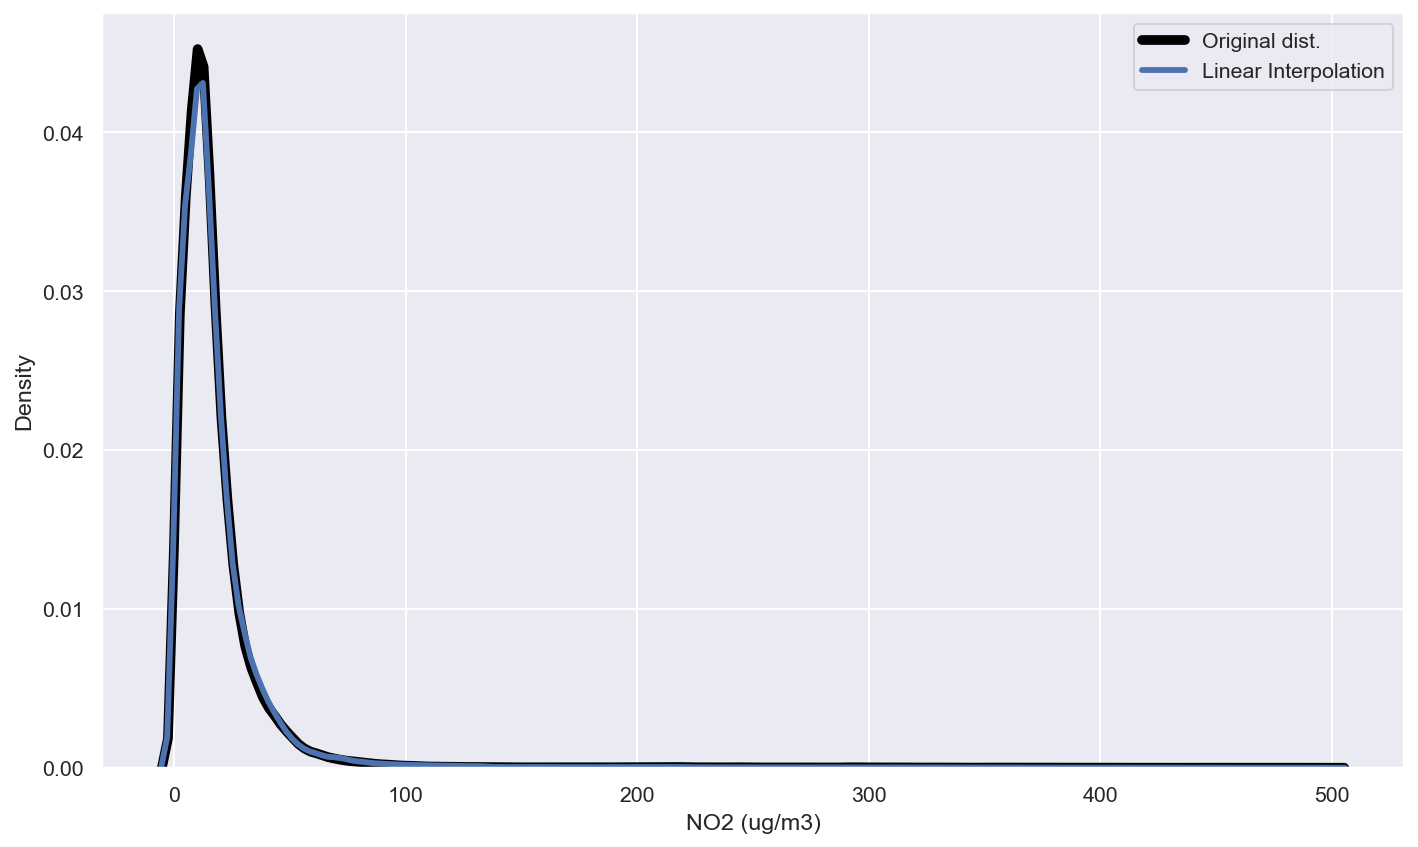

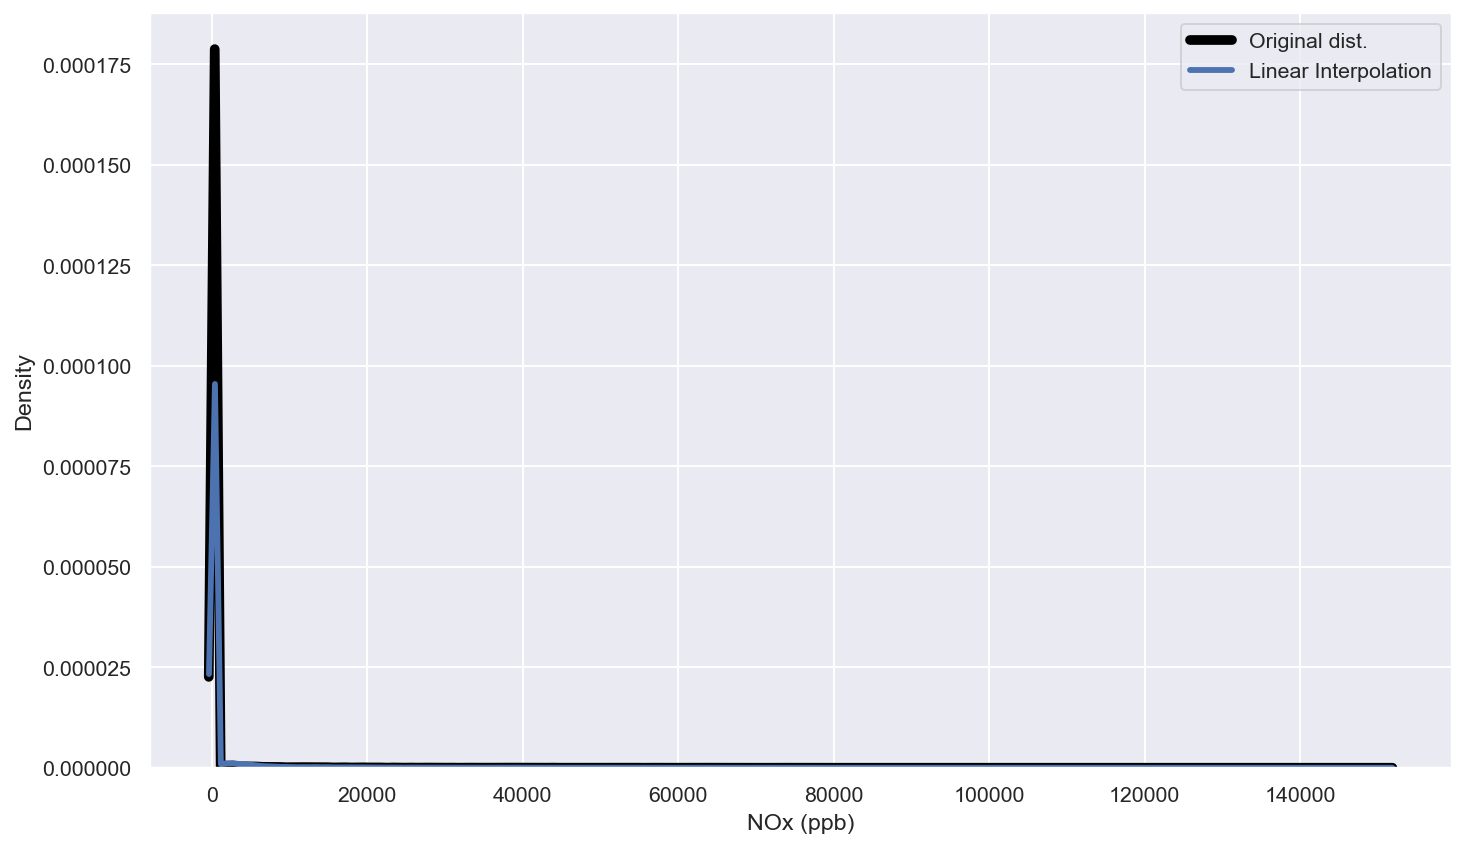

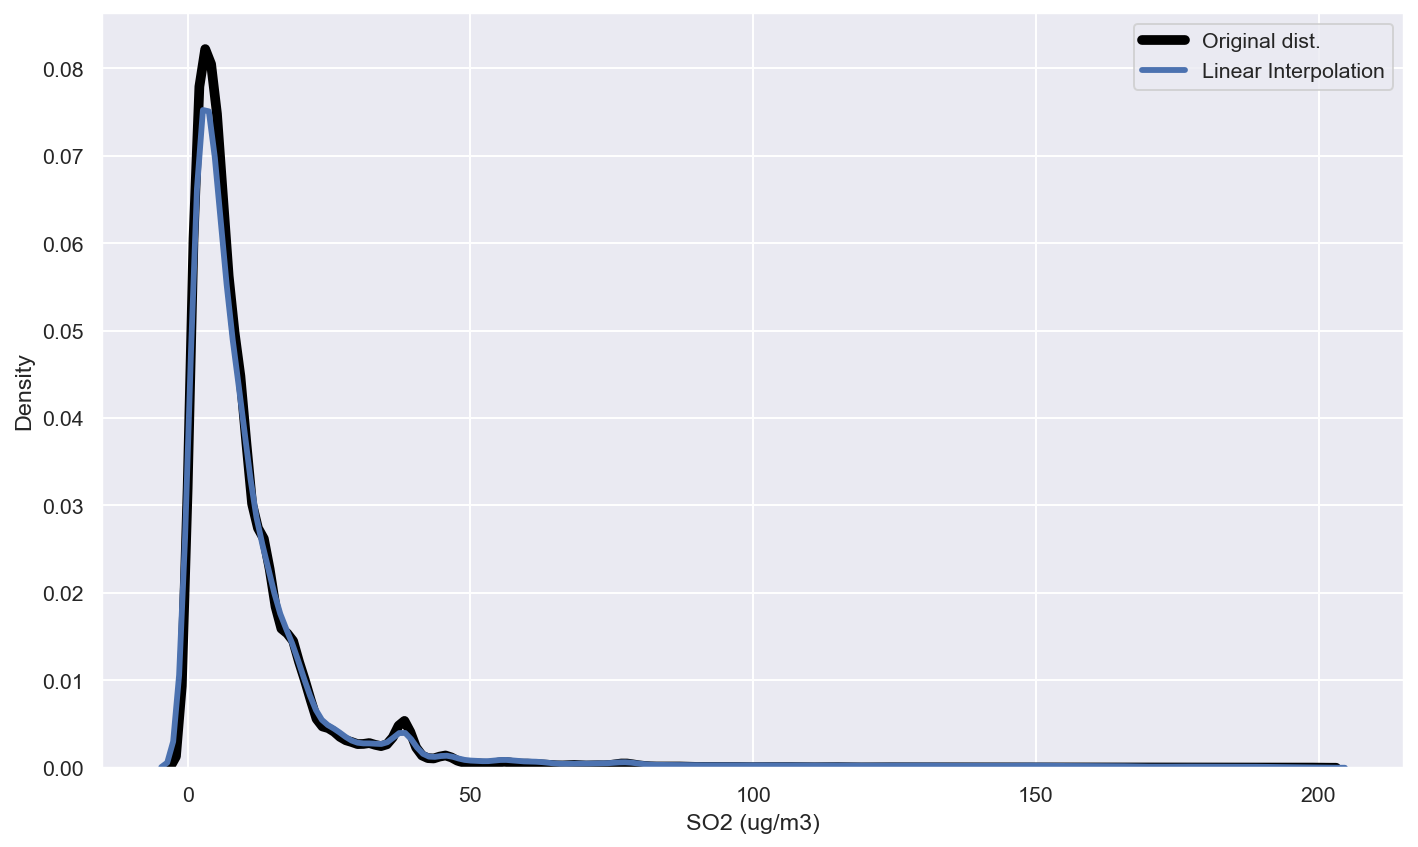

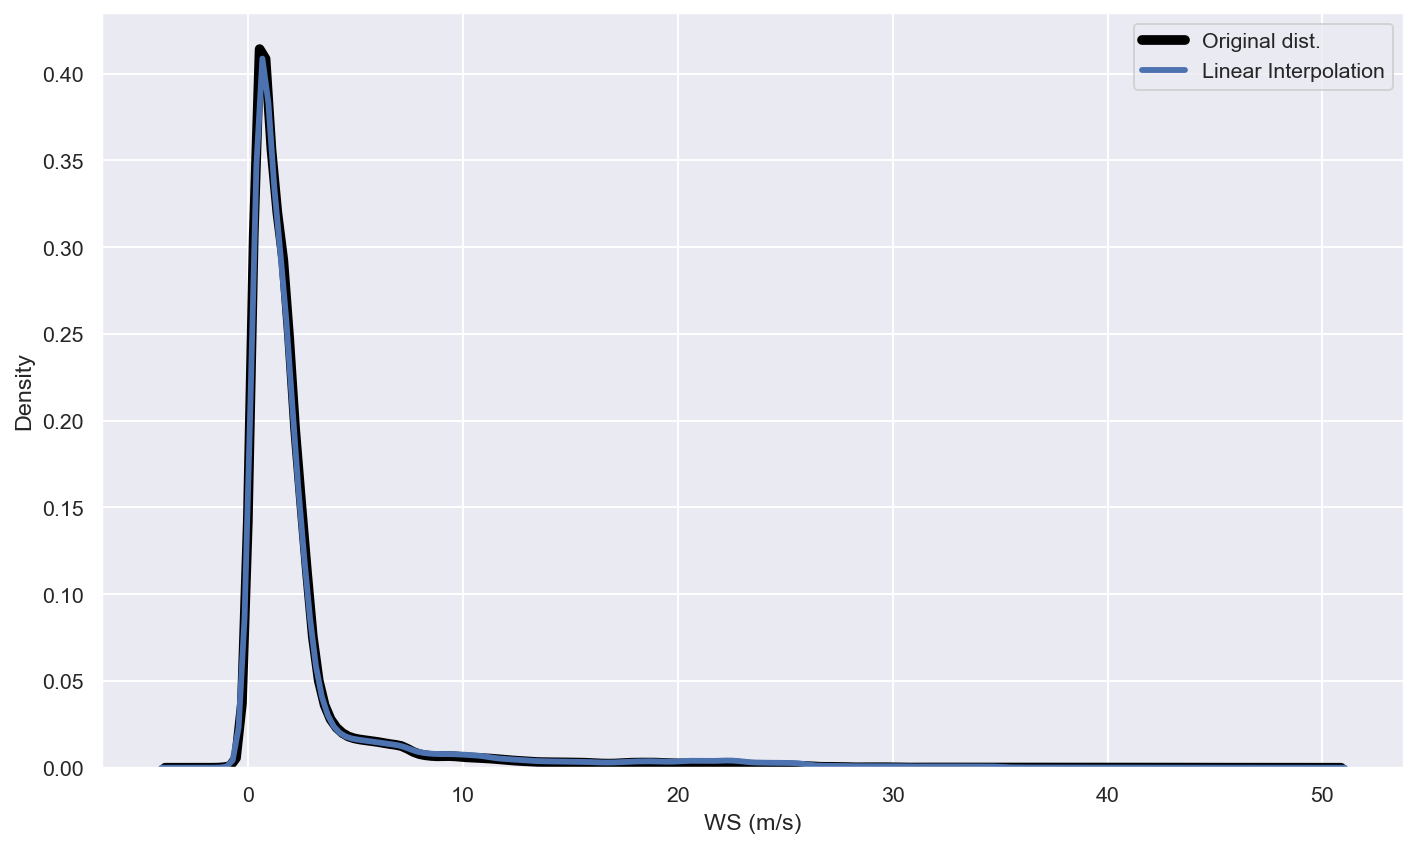

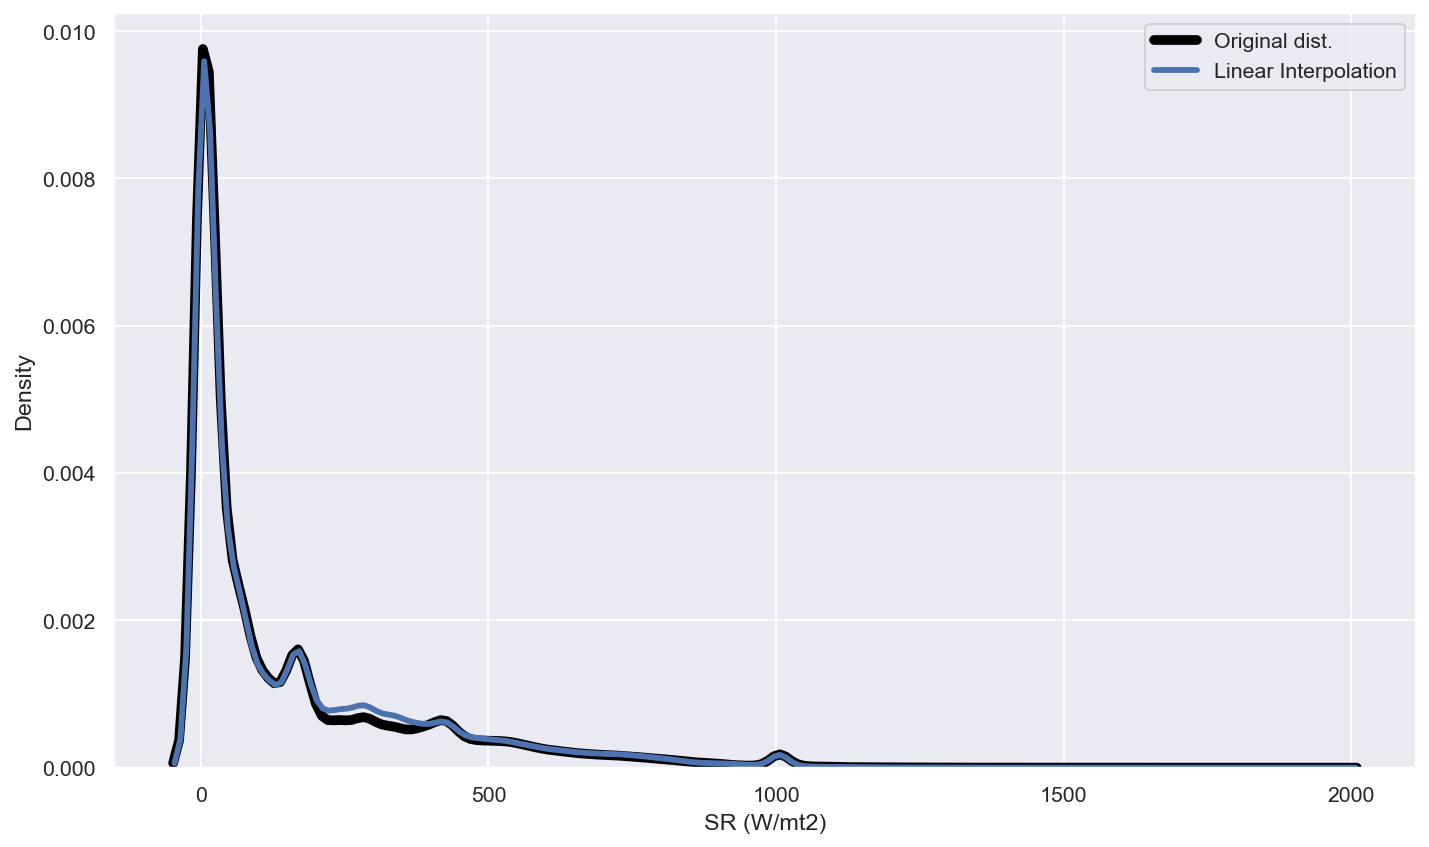

In [52]:
for i in interpolateble_values[:-1]:
    missing_value_validation(i)

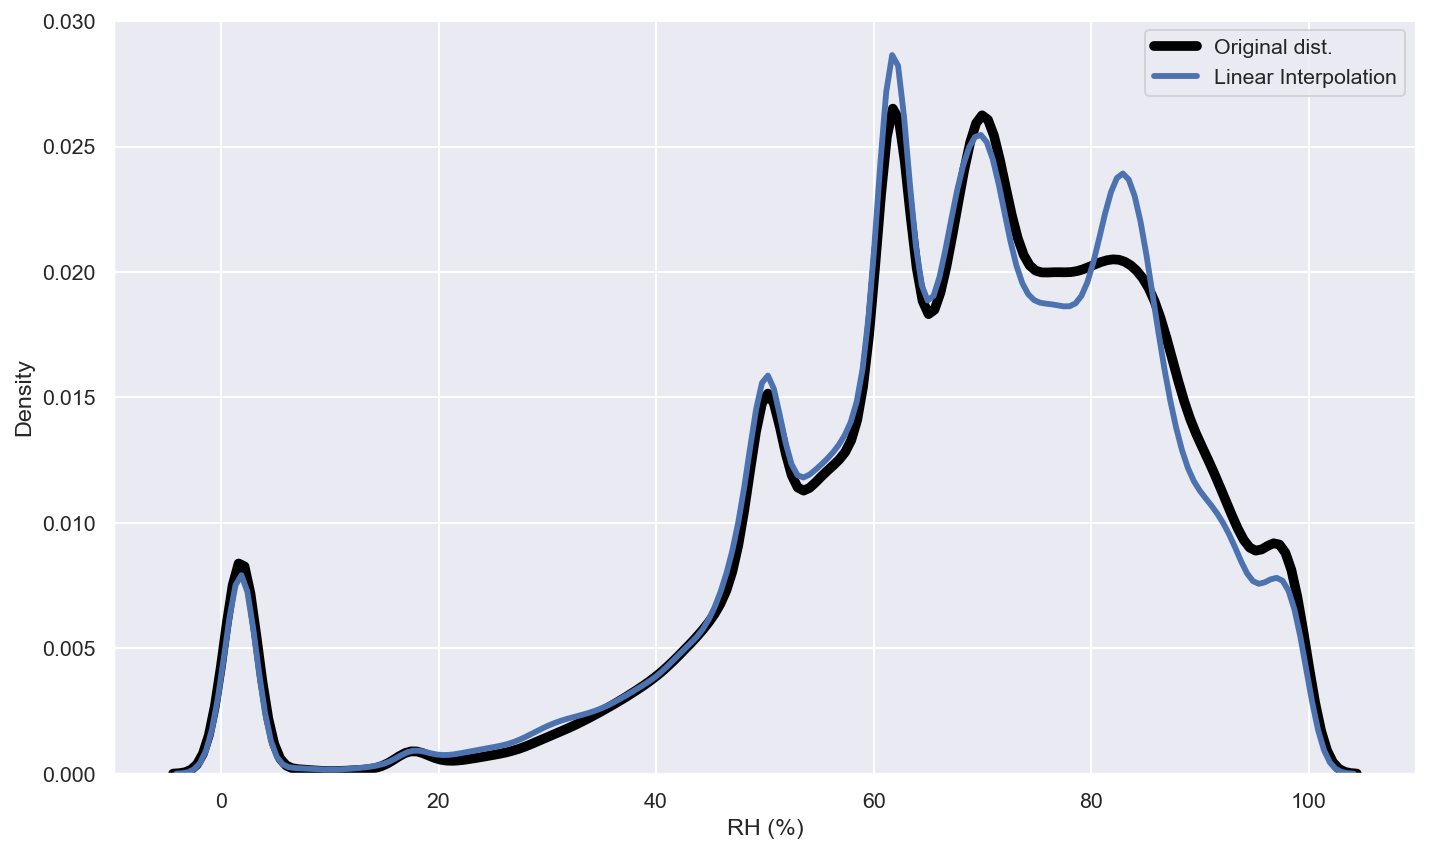

In [53]:
missing_value_validation("RH (%)")

In [32]:
interpolateble_values.remove('city')
interpolateble_values.remove('NOx (ppb)')
interpolateble_values

['NO2 (ug/m3)', 'SO2 (ug/m3)', 'WS (m/s)', 'SR (W/mt2)']

In [35]:
for i in range(len(interpolateble_values)):
    data[interpolateble_values[i]].interpolate(method='linear',inplace=True)
data['NOx (ppb)'].interpolate(method='pad',inplace=True)
data["RF (mm)"].fillna(0,inplace=True)
null_value_percentage(data)

C:\Users\Abdul Basith R\AppData\Local\Temp\ipykernel_23160\4209178013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[interpolateble_values[i]].interpolate(method='linear',inplace=True)


{'PM2.5 (ug/m3)': 0.286,
 'PM10 (ug/m3)': 0.204,
 'NO (ug/m3)': 0.25,
 'NO2 (ug/m3)': 0.0,
 'NOx (ppb)': 0.191,
 'NH3 (ug/m3)': 0.33,
 'SO2 (ug/m3)': 0.0,
 'CO (mg/m3)': 0.302,
 'Ozone (ug/m3)': 0.32,
 'Benzene (ug/m3)': 0.531,
 'Toluene (ug/m3)': 0.577,
 'Temp (degree C)': 0.66,
 'RH (%)': 0.202,
 'WS (m/s)': 0.0,
 'SR (W/mt2)': 0.0,
 'BP (mmHg)': 0.362,
 'city': 0.0,
 'WD (degree)': 0.286,
 'RF (mm)': 0.624}

In [52]:
data["RF (mm)"]

array([      nan, 0.000e+00, 1.640e+00, 9.810e+00, 8.990e+00, 3.000e-02,
       1.300e-01, 1.500e-01, 8.000e-02, 1.000e-02, 7.000e-02, 6.000e-02,
       4.000e-02, 7.500e-01, 1.500e+00, 7.500e+00, 2.500e-01, 2.750e+00,
       1.750e+00, 3.750e+00, 5.000e-01, 2.250e+00, 1.250e+00, 4.000e+00,
       3.250e+00, 2.000e+00, 1.000e+00, 5.000e+00, 4.750e+00, 1.075e+01,
       1.525e+01, 3.300e-01, 5.250e+00, 2.050e+01, 3.000e+00, 2.500e+00,
       5.500e+00, 2.325e+01, 1.650e+01, 9.750e+00, 4.250e+00, 1.000e+01,
       4.500e+00, 3.500e+00, 1.550e+01, 1.050e+01, 3.000e-01, 3.500e-01,
       3.200e-01, 8.000e-01, 7.300e-01, 2.200e+00, 6.000e-01, 4.670e+00,
       5.100e+00, 5.600e+00, 6.150e+00, 6.650e+00, 3.050e+00, 1.320e+00,
       2.230e+00, 1.100e+00, 1.630e+00, 8.000e+00, 9.250e+00, 1.150e+01,
       7.250e+00, 9.000e+00, 1.750e+01, 1.330e+00, 6.250e+00, 1.225e+01,
       8.250e+00, 1.800e+01, 6.700e-01, 1.100e+01, 7.000e+00, 2.725e+01,
       1.300e+01, 1.350e+01, 8.750e+00, 6.750e+00, 

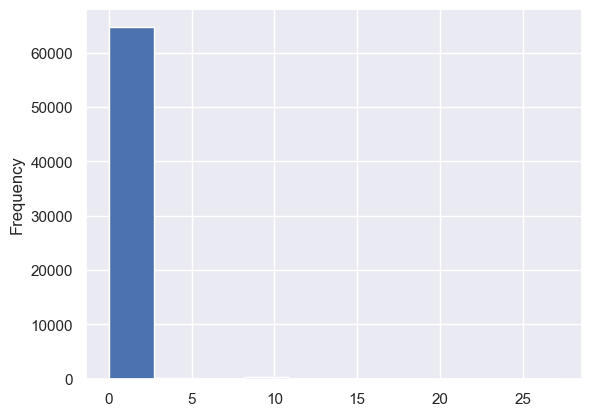

In [53]:
data['RF (mm)'].plot.hist()
plt.show()

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = data.drop('city',axis =1).copy(deep=True)

mice_imputer = IterativeImputer(max_iter=100)
mice_imputer.fit_transform(train_mice)

array([[3.50900000e+01, 6.89900000e+01, 5.07000000e+00, ...,
        7.61550000e+02, 1.00490000e+02, 8.76920865e-01],
       [3.01000000e+01, 6.13100000e+01, 3.92000000e+00, ...,
        7.61030000e+02, 9.16200000e+01, 6.29127889e-01],
       [3.14200000e+01, 6.33400000e+01, 3.44000000e+00, ...,
        7.60460000e+02, 1.03660000e+02, 7.41833208e-01],
       ...,
       [3.60000000e+01, 5.60000000e+01, 4.49480000e+02, ...,
        1.00300000e+03, 2.05060000e+02, 1.21800984e+00],
       [4.03300000e+01, 5.88400000e+01, 4.44790000e+02, ...,
        1.00194000e+03, 1.99860000e+02, 1.18953897e+00],
       [4.22200000e+01, 6.15700000e+01, 4.39940000e+02, ...,
        1.00088000e+03, 1.59840000e+02, 1.02189730e+00]])

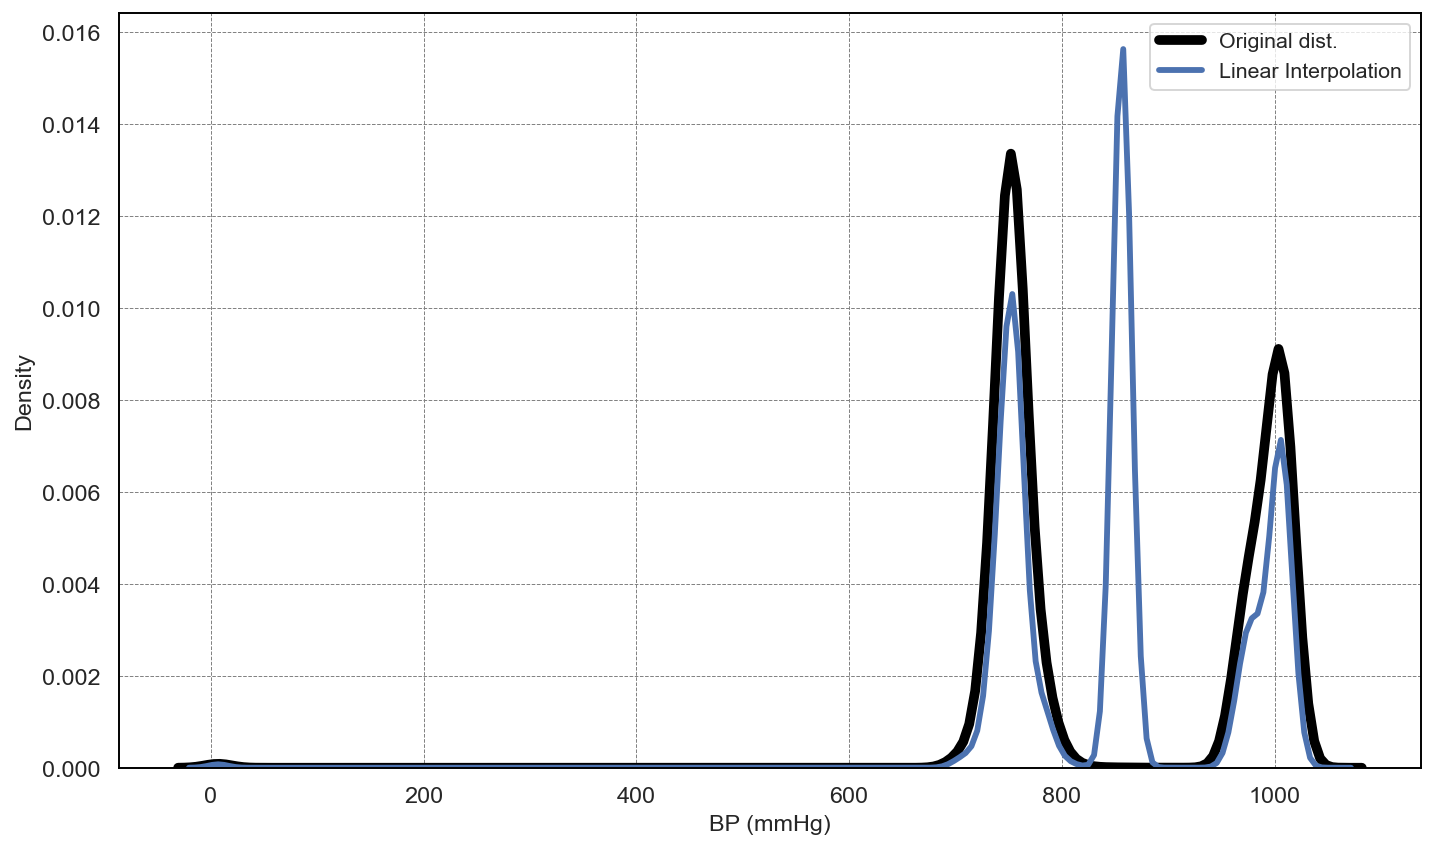

In [92]:
compare_dists(train_mice['Temp (degree C)'], {"Linear Interpolation":train_mice['RH (%) 1'] })

In [66]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = data.drop("city",axis=1).copy(deep=True)
columns = train_mice.columns
mice_imputer = IterativeImputer(random_state = 42, max_iter=10)
train_mice = mice_imputer.fit_transform(train_mice)
train_mice = pd.DataFrame(train_mice,columns=columns)

P:\anaconda\envs\deep_learning\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [102]:
data["RF (mm)"].fillna(0,inplace=True)

C:\Users\Abdul Basith R\AppData\Local\Temp\ipykernel_26576\728157638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RF (mm)"].fillna(0,inplace=True)


In [54]:
# Example for PM2.5 column
q1 = data['PM2.5 (ug/m3)'].quantile(0.25)
q3 = data['PM2.5 (ug/m3)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['PM2.5 (ug/m3)'] < lower_bound) | (data['PM2.5 (ug/m3)'] > upper_bound)]

In [55]:
outliers

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),city,WD (degree),RF (mm)
datetime,,,,,,,,,,,,,,,,,,,
2022-01-13 07:00:00,239.58,383.59,10.73,17.14,27.87,29.32,42.61,1.89,15.38,0.00,0.00,NaN,90.41,0.86,21.01,758.77,Chennai,247.81,NaN
2022-01-13 08:00:00,193.50,312.70,3.51,10.78,14.29,15.85,46.84,1.33,10.59,0.00,0.00,NaN,79.98,0.90,31.98,759.30,Chennai,242.60,NaN
2022-05-02 12:00:00,184.19,298.37,1.18,12.57,13.75,22.54,9.35,2.00,135.31,0.82,1.55,NaN,40.45,0.90,37.28,746.55,Chennai,179.78,NaN
2022-05-02 13:00:00,103.44,174.13,3.31,9.90,13.20,31.12,8.65,0.68,66.36,0.94,1.76,NaN,46.08,1.22,26.07,746.02,Chennai,202.09,NaN
2022-06-04 00:00:00,203.00,93.08,3.32,4.32,7.63,10.53,11.81,0.91,48.07,0.51,1.00,NaN,80.56,1.22,9.27,749.85,Chennai,255.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14 00:00:00,87.86,90.00,NaN,37.90,445.04,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.14,0.00,1006.32,Ariyalur,271.68,NaN
2023-02-17 08:00:00,94.57,110.22,452.56,42.37,390.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.49,315.41,1006.82,Ariyalur,315.81,NaN
2023-02-17 09:00:00,86.07,118.34,452.07,56.87,397.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,471.64,1007.31,Ariyalur,218.40,NaN


In [68]:
null_value_percentage(train_mice)

{'PM2.5 (ug/m3)': 0.0,
 'PM10 (ug/m3)': 0.0,
 'NO (ug/m3)': 0.0,
 'NO2 (ug/m3)': 0.0,
 'NOx (ppb)': 0.0,
 'NH3 (ug/m3)': 0.0,
 'SO2 (ug/m3)': 0.0,
 'CO (mg/m3)': 0.0,
 'Ozone (ug/m3)': 0.0,
 'Benzene (ug/m3)': 0.0,
 'Toluene (ug/m3)': 0.0,
 'Temp (degree C)': 0.0,
 'RH (%)': 0.0,
 'WS (m/s)': 0.0,
 'SR (W/mt2)': 0.0,
 'BP (mmHg)': 0.0,
 'WD (degree)': 0.0,
 'RF (mm)': 0.0}